<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 90px">

# Experimental Design

<br><br>

In this notebook, we'll
* Randomly assign experimental units to treatments and conduct an "experiment"
* Explore the results of the "experiment" using EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/example.csv")
df.head()

,uid,block
0,1,2
1,2,1
2,3,2
3,4,1
4,5,2


In [3]:
df["block"].value_counts()

2    17
1    13
Name: block, dtype: int64

## Treatment Allocation into 3 Treatments (no blocking)
This is commonly done by generating random numbers and sorting them.

In [4]:
# Set seed
np.random.seed(100)

# Assign a column of random numbers
df["rnd"] = np.random.rand(df.shape[0])

In [5]:
# Sort by the random numbers
# (actually not necessary, but common practice)
df.sort_values("rnd", inplace=True)

In [6]:
# Get their orderings via ".rank()"
df["rank"] = df["rnd"].rank()

In [7]:
# Neat trick to get intervals of length 10
df["trt"] = (df["rank"] - 1).astype(int) // 10

In [8]:
# Remap them to the true treatment name
df["trt"] = df["trt"].map({0: 'A', 1: 'B', 2: 'C'})

In [9]:
df

,uid,block,rnd,rank,trt
4,5,2,0.004719,1.0,A
26,27,2,0.005689,2.0,A
29,30,2,0.015255,3.0,A
13,14,2,0.108377,4.0,A
5,6,1,0.121569,5.0,A
8,9,1,0.136707,6.0,A
17,18,1,0.171941,7.0,A
24,25,1,0.175410,8.0,A
12,13,1,0.185328,9.0,A
11,12,1,0.209202,10.0,A


## Experimental EDA

In [10]:
from experiment import conduct_experiment

In [11]:
df = conduct_experiment(df)

In [12]:
# Mean values of each treatment?
df.groupby('trt')["value"].mean()

trt
A    118.421904
B     80.290545
C     99.737084
Name: value, dtype: float64

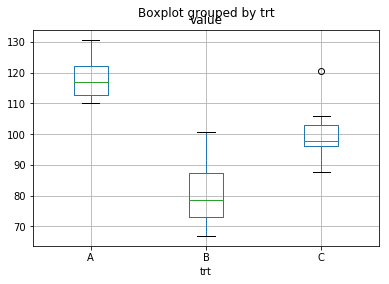

In [13]:
# Boxplot - do you think these treatments had an impact on resulting value?
df.boxplot(column="value", by="trt")

## (BONUS) Treatment Allocation into 3 Treatments (With Blocking)

In [14]:
df = pd.read_csv("data/example.csv")

In [15]:
def assign_ranks(grp):
    n_rows = grp.shape[0]
    grp["rank"] = grp["rnd"].rank()
    grp["trt"] = (grp["rank"] - 1).astype(int) // (n_rows / 3)
    grp["trt"] = grp["trt"].map({0: 'A', 1: 'B', 2: 'C'})
    return grp

In [16]:
df["rnd"] = np.random.rand(df.shape[0])
df = df.groupby("block").apply(assign_ranks)

In [17]:
pd.crosstab(df.trt, df.block)

block,1,2
trt,,
A,5,6
B,4,6
C,4,5
